# 感知机demo

## 1、引入对应的库并查看数据集内容

In [1]:
import numpy as np
from sklearn import datasets
# 鸢尾花数据集
import matplotlib.pyplot as plt
# 引入对应库

In [3]:
irisData = datasets.load_iris()
irisData
print("targetName:%s" % irisData["target_names"])
print("featureName:%s" % irisData["feature_names"])
print("target:%s" % irisData["target"])
dataSet = irisData["data"]
dataSet[1:5]

targetName:['setosa' 'versicolor' 'virginica']
featureName:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

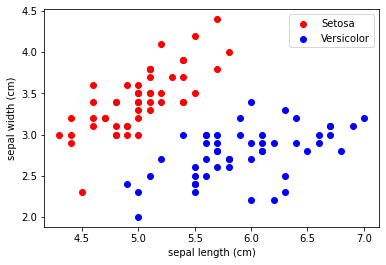

In [4]:
dataSetosa = dataSet[irisData["target"]==0]
dataVersicolor = dataSet[irisData["target"]==1]
# 根据target标签索引两个品种数据
plt.scatter(dataSetosa[:,0],dataSetosa[:,1],color='red',marker='o',label='Setosa')
plt.scatter(dataVersicolor[:,0],dataVersicolor[:,1],color='blue',marker='o',label='Versicolor')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
# 仅选取两个维度绘制二维平面图
plt.show()

## 2、建立感知机模型

In [112]:
class Perceptron:
    '''
    感知机类
    实例化需先初始化变量数，传参num，范围为2：4,默认为2
    t为训练的步长默认为0.02
    '''
    def __init__(self, num=2, t=0.02):
        self.w = np.zeros(num).reshape(num,1)
        self.b = 0
        self.t = t
    def funShuffle(self, obj, target):
        index = np.random.choice(np.arange(obj.shape[0]), size = obj.shape[0], replace = False)
        # 产生一个随机不重复的序列
        self.listTrain = []
        self.listTest = []
        for i in range(obj.shape[0]):
            diff = -1 if target[index[i]] else 1
            if (i < 0.8 * obj.shape[0]):
                self.listTrain.append([obj[index[i]], diff])
            else:
                self.listTest.append([obj[index[i]],diff])
    def funTrain(self, num=2000):
        '''
        传参num为迭代次数
        obj为传入的数据集行向量为样本
        '''
        for i in range(num):
            count = 0
            # 统计失配的个数
            flage = True
            # 是否失配的标记
            for j in self.listTrain:
                count += 1
                r = np.matmul(j[0], self.w) + self.b
                if (j[1] * r[0] <= 0):
                    flage = False
                    self.w += (self.t * j[1]) * j[0].reshape([2,1])
                    self.b += self.t * j[1]
                    break
            if flage:
                print("完成训练！")
                return True
            if ((i+1) % 50 == 0):
                print("loss:%.5f" % (1/count))
        print("有限迭代次数下超平面训练失败,该数据或线性不可分!")
        return False
    def funTest(self):
        count = 0 # 初始化识别错误的个数
        for i in self.listTest:
            r = np.matmul(i[0], self.w) + self.b
            if (i[1] * r[0] <= 0):
                count += 1
        return count/len(self.listTest)
    def funOut(self, obj):
        '''
        obj为符合实例对象变量个数的行向量
        '''
        r = np.matmul(obj, self.w) + self.b
        return "Setosa" if r > 0 else "Versicolor"

## 3、实例化对象并训练

In [114]:
tmp1 = Perceptron()
# print(tmp1.w)
tmp1.funShuffle(dataSet[0:100][:,0:2], irisData["target"][0:100])
# 只取了模型的前100个，属于两种不同的类，
# 取数据集的前两列表示只取两个变量，实际可以取两个以上变量
# 这里用两个变量只为了方便可视化
result = tmp1.funTrain()
model2 = Perceptron(t=0.04)
# 分别初始化两个模型，设定步长为0.04
model2.funShuffle(dataSet[0:100][:,0:2], irisData["target"][0:100])
result2 = model2.funTrain()

loss:0.50000
loss:0.50000
loss:0.16667
loss:0.03846
loss:1.00000
loss:0.16667
loss:1.00000
loss:0.03846
loss:0.03846
loss:0.33333
loss:0.01515
loss:0.03846
loss:0.33333
loss:0.03846
loss:0.16667
loss:0.01515
loss:0.33333
loss:0.33333
loss:0.33333
完成训练！
loss:1.00000
完成训练！


## 4、二维超平面的可视化

tmp1模型的w1、w2、b分别为：[-1.01] [1.274] 1.620000000000001
model2模型的w1、w2、b分别为：[-0.464] [0.776] 0.04


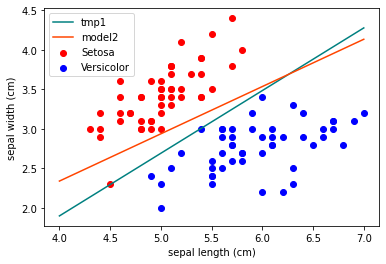

In [143]:
print("tmp1模型的w1、w2、b分别为：", end="")
print(tmp1.w[0], tmp1.w[1], tmp1.b)
print("model2模型的w1、w2、b分别为：", end="")
print(model2.w[0], model2.w[1], model2.b)
x = np.linspace(4, 7, 50)
y2 = (tmp1.w[0]*x + tmp1.b) / (-tmp1.w[1])
y3 = (model2.w[0]*x + model2.b) / (-model2.w[1])
plt.scatter(dataSetosa[:,0],dataSetosa[:,1],color='red',marker='o',label='Setosa')
plt.scatter(dataVersicolor[:,0],dataVersicolor[:,1],color='blue',marker='o',label='Versicolor')
plt.plot(x, y2, color="teal", label="tmp1")
plt.plot(x, y3, color="orangered", label="model2")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
# 仅选取两个维度绘制二维平面图
plt.show()

## 5、查看模型评估结果：

In [117]:
errorResult = tmp1.funTest()
errorResult2 = model2.funTest()
print("tmp1模型测试集错误率%.4f" % (errorResult*100), end="%\n")
print("model2模型测试集错误率%.4f" % (errorResult2*100), end="%")

tmp1模型测试集错误率0.0000%
model2模型测试集错误率5.0000%

## 6、模型输出测试：

In [131]:
newData = np.random.uniform(2, 7, (1, 2))
newData2 = np.random.uniform(2, 7, (1, 2))
# print(newData, newData2)
output1 = tmp1.funOut(newData)
output2 = tmp1.funOut(newData2)
print("模型一%s数据识别为%s，%s数据为%s" %(newData, output1,newData2, output2))

模型一[[5.62909218 2.9706477 ]]数据识别为Versicolor，[[6.95089443 4.73850476]]数据为Setosa
